In [ ]:
#Import Libraries

import numpy as np #Numerical Computing.
import os #I/O.
import tensorflow as tf #Machine Learning.
from tensorflow.keras.preprocessing import image_dataset_from_directory #Dataset Generator.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import pickle
from sklearn import metrics

tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "../content/drive/MyDrive/Bio/Data.zip" -d "/content"

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_180.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1800.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1801.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1802.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1803.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1804.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1805.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1806.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1807.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1808.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1809.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_181.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1810.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1811.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1812.jpg  
  infla

In [ ]:
Categories = ['B','N']
flat_data_arr = []
target_arr = []



pathB = '../content/TRAIN.1/B'


pathN ='../content/TRAIN.1/N'

listPath = [pathB, pathN]
contatore_originale = 0
contatore_non_originale = 0



#LOAD BIO
for i in range (0,2):
  conteggio = 0
  path = listPath[i]
  print(path)
  for img in os.listdir(path):
    if (conteggio == 6000): break
    print(conteggio)

    if i==1: # non bio 
      if "ORI" in img:
        contatore_originale +=1
      elif "ORI" not in img:
        contatore_non_originale+=1

    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(32,32,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(Categories[i]))
    conteggio = conteggio + 1
  print(f"sezione {i} caricata")


print("entro nella zona1")
flat_data = np.array(flat_data_arr)
print("è la zona 2 a darmi problemi?")
target = np.array(target_arr)

print()

#Creo un dataframe dai dati np
print("entro nella zona2")
df = pd.DataFrame(flat_data)
df['Target'] = target
print("fatto")

In [ ]:
print(contatore_originale)
print(contatore_non_originale)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=77,stratify=y)

print(x)
print(y)

In [ ]:
param_grid={'C':[100,10,1,0.01],'kernel':['rbf','poly'], 'gamma':[0.1,1,10] }
svc=svm.SVC(probability=True)
#model = svc
model=GridSearchCV(svc,param_grid)

#{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'} QUESTO è CIO CHE DEVO METTERE

# test if CPU and GPU are visible
c = tf.config.get_visible_devices()
print(c)
# [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
#  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print("inizio allenamento")
model.fit(x_train,y_train)
print('Fine allenamento')
print(model.best_params_)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
inizio allenamento
Fine allenamento
{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
y_pred = model.predict(x_test)
print("The predicted data is : ")
y_pred

The predicted data is : 


array([0, 1, 1, ..., 0, 0, 0])

{'C': 0.01, 'kernel': 'linear'}


In [ ]:
print("the actual data is:")
np.array(y_test)

In [ ]:

#vediamo l'accuratezza:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay (confusion_matrix = confusion_matrix, display_labels = ['B','N'])
cm_display.plot()
plt.show()




In [ ]:
#Metrics
#of the positives predicted, what percentage is truly positive?
precision = metrics.precision_score(y_test, y_pred)
print(f"Precision: {precision*100}% ")
#how good the model is at predicting positives?
sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(f"Sensitivity: {sensitivity_recall*100}% ")
#how good the model is at predicting negatives?
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(f"Specificity: {specificity*100}% ")
f1_score = metrics.f1_score(y_test, y_pred)
print(f"F-Score: {f1_score * 100}")


Precision: 84.50226244343891% 
Sensitivity: 83.0% 
Specificity: 84.77777777777777% 
F-Score: 83.74439461883408


In [ ]:
#Salvo il modello
pickle.dump(model, open('classificatore.p','wb'))
print("Pickle is dumped successfully")


Pickle is dumped successfully


In [ ]:
!unzip "../content/drive/MyDrive/Bio/TEST.zip" -d "/content"

In [ ]:
images_wrong = [] # tutte le immagini sbagliate per poi riprovarle

0 -> Insert and URL, 1 -> random photo from TEST set, 2-> Exit
what kind of image do you want to classify? /n (0 -> Bio,  1-> Non-Bio)
let's load a casual image:
There are 8363 images


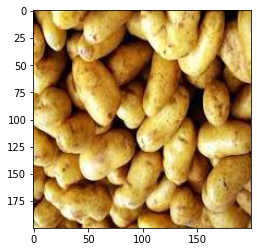

B = 95.181498380204%
N = 4.818501619795998%
The predicted image is : B
Is the image a B ?(y/n)
Great!
0 -> Insert and URL, 1 -> random photo from TEST set, 2-> Exit
what kind of image do you want to classify? /n (0 -> Bio,  1-> Non-Bio)
let's load a casual image:
There are 8363 images


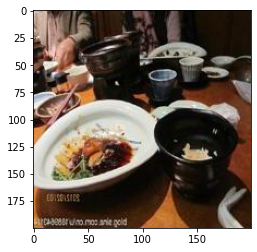

B = 44.58108277731773%
N = 55.41891722268225%
The predicted image is : N
Is the image a N ?(y/n)
What is the image?
Enter 0 for B
Enter 1 for N
Please wait for a while for the model to learn from this image :)
prova -> 0.01
prova -> 0.1
prova -> linear
The model is now 85.34554537885096% accurate
Great!
0 -> Insert and URL, 1 -> random photo from TEST set, 2-> Exit


In [ ]:
import random


#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('classificatore.p','rb'))

#load of images


path_0 = '../content/TEST/B'
path_1 = '../content/TEST/N'


while(True):


  print("0 -> Insert and URL, 1 -> random photo from TEST set, 2-> Exit")
  mod = int(input())

  if(mod == 1):
    print("what kind of image do you want to classify? /n (0 -> Bio,  1-> Non-Bio)")
    choice = int(input())
    while(choice<0 or choice>=len(Categories)):
        print(f"Please enter a valid number between 0-{len(Categories)-1}")
        choice=int(input())
  

 
   

    if(choice):
      path = path_1
    else:
      path = path_0

    print("let's load a casual image:")

    lunghezza = len(os.listdir(path))

    print(f"There are {lunghezza} images")


    random_i= random.randint(0, lunghezza-1)
    random_img = os.listdir(path)[random_i]

    img = imread(os.path.join(path,random_img))
  elif(mod==0):
    url=input('Enter URL of Image:')
    img=imread(url)
  else:
    print("Exit..")
    break


    
    



  plt.imshow(img)
  plt.show()
  img_resize=resize(img,(32,32,3)) #faccio un resize della foto
  l=[img_resize.flatten()] # l ora è un vettore 

  #probability è un vettore che contiene la probabilità 
  #dell'oggetto di essere l'iesima classe
  probability=model.predict_proba(l) 

  for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
  print("The predicted image is : "+Categories[model.predict(l)[0]])
  print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')


  while(True):
    b=input()
    if(b=="y" or b=="n"):
      break
    print("please enter either y or n")

  #nel caso la predizione fosse sbagliata
  if(b=='n'):
    images_wrong.append(img)
    print("What is the image?")
    for i in range(len(Categories)):
        print(f"Enter {i} for {Categories[i]}")
    k=int(input())
    while(k<0 or k>=len(Categories)):
      print(f"Please enter a valid number between 0-{len(Categories)-1}")
      k=int(input())
    print("Please wait for a while for the model to learn from this image :)")
    #A questo punto il modello impara dagli errori 
    flat_arr=flat_data_arr.copy() # mi prendo flat_data iniziale
    tar_arr=target_arr.copy() # mi prendo targ_arr iniziale
    tar_arr.append(k) # appendo nella label la nuova "predizione"
    flat_arr.extend(l) # appendo la nuova immagina a cui è collegata la predizione
    #ritrasformo in np_arry
    tar_arr=np.array(tar_arr) 
    flat_df=np.array(flat_arr)
    #uso i dataframe di pandas come prima 
    df1=pd.DataFrame(flat_df)
    df1['Target']=tar_arr
    #"riaddestro il modello"
    model1=GridSearchCV(svc,param_grid)
    x1=df1.iloc[:,:-1]
    y1=df1.iloc[:,-1]
    x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
   
    d={}
    for i in model.best_params_:
      print(f"prova -> {model.best_params_[i]}")
      d[i]=[model.best_params_[i]]
    model1=GridSearchCV(svc,d)
    model1.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
    pickle.dump(model1,open('classificatore.p','wb'))
  print("Great!")


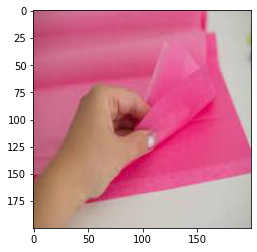

B = 53.30717445428819%
N = 46.69282554571182%
The predicted image is : B
Is the image a B ?(y/n)


In [ ]:

for image in images_wrong:
  plt.imshow(img)
  plt.show()
  img_resize=resize(img,(32,32,3)) #faccio un resize della foto
  l=[img_resize.flatten()] # l ora è un vettore 
  probability=model.predict_proba(l) 

  for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
  print("The predicted image is : "+Categories[model.predict(l)[0]])
  print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')